<a href="https://colab.research.google.com/github/AsutoshBeuria/Stock-Predictions-Model-using-Geometric-Brownian-Motion/blob/main/Predictive_Stock_Price_Model_using_Geometric_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Application of fluid dynamics to build a predictive model.


Daily market OHLCV data for TSLA (contained in the CSV file) 

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/rafa-colab/TSLA.csv')

In [ ]:
df

,close,high,low,open,volume,div,split,pivot,weight
0,4.778,5.00000,3.5080,3.8000,93831500,0.0,1.0,NaN,NaN
1,4.766,6.08384,4.6600,5.1580,85935500,0.0,1.0,NaN,NaN
2,4.392,5.18400,4.0540,5.0000,41094000,0.0,1.0,NaN,NaN
3,3.840,4.62000,3.7420,4.6000,25699000,0.0,1.0,NaN,NaN
4,3.222,4.00000,3.1660,4.0000,34334500,0.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2819,752.920,760.20000,739.2600,740.0000,20039825,0.0,1.0,NaN,NaN
2820,753.870,764.45000,740.7733,761.5800,18793036,0.0,1.0,NaN,NaN
2821,754.860,762.10000,751.6301,753.4100,14077731,0.0,1.0,NaN,NaN
2822,736.270,762.61000,734.5201,759.6000,15184170,0.0,1.0,NaN,NaN


# Predictive Model by using Geometric Brownian Motion

•Geometric Brownian Motion is widely used to model stock prices in finance. If we
focus only on major, longer duration trends in the stock prices,disregarding the small fluctuations. We can realize that the stock price follows a wavy path.

•If we focus on shorter-term fluctuations we can see that the general trend is sometimes downward and sometimes upward. There is lot of randomness in the the stock prices.

•This can be analogous to the dispersion and diffusion of a particle inside a fluid. The particle when left undisturbed , follows a random path inside the fluid domain, hence the theory of Brownian Motion exists. The theory of Brownian motion is characterized by $drift$ and $diffusion$ of the molecules.

•The same Brownian motion can be extended to Geometric Brownian Motion model for simulating Stock prices.




From the given data, it can be inferred that

1:TSLA stock price tends to rise over a period of time\
2:There are random shocks each day in the closing prices of the market that result in an irregular line plot.

As a result, we need a suitable model that takes into account both types of movements in the stock price. This is where $Discrete -Time- Geometric -Brownian- Motion$ comes into play. GBM has two components that do this job. One component incorporates the long-term trend while the other component applies random shocks. 

## Drift and Volatility

### Drift

•Drift reflects the longer-term trend in stock prices.Drift is a constant value and if we suppose there is no random shock, we can apply it to the stock price at the time point (t-1) as you can see in the above expression.

•If we keep applying the drift without any random shock, stock prices smoothly go up if drift is positive or goes down if drift is negative. We can notice that the stock prices can never become 0 since drift is applied through the exponential function. 

### Volatility/Diffusion

•Diffusion reflects shorter-term fluctuations. When calculating the diffusion component, we multiply the random value z(k) with sigma.

•Also, the diffusion component makes it possible to create different stock price prediction scenarios. The drift component is constant. We can’t create different scenarios out of it, but the diffusion component helps us create as many scenarios as we want since it involves Wiener process(It creates independent, stationary and normally distributed random shocks).

•So, when making a prediction for the time point (k) considering the stock price at the time point (k-1), we need to add the effects of both of the components. The total combined effect gives us the prediction for the time point (k). 

•If there would only be the drift component, we would always know what the stock price will become in the next time point, but the diffusion component disturbs this smoothness by introducing random shock. So, we don’t observe a monotonous increase or decrease trend for the stock prices. 


## Parameters involved in the model

1: $T$ - Total Time period for prediction \
2: $dt$ - Incremental time period between two consequitive closing prices ,in our case it is 1 day \
3: $N$ - Number of time points in the prediction time horizon, N = T/dt \
4: $t$ - Array the time progression in our model is shown.It is like a time ticker\
where we measure time by counting the number of time points elapsed\
5: $mu$ - Mean return of the stock prices within the historical time frame we are using for prediction



6: $sigma$ - Standard deviation of returns of the returns from historical stock prices\
7: $b$ - Array where we add randomness to our model.For each corresponding prediction time point,\
 stores a random number coming from the standard normal distribution. These random numbers will add the random shocks\
8: $W$ -It is the Brownian path and which determines how the stock prices fluctuate from beginning time point(So) to some other time point t.\
9: $So$ - The closing price of the beginning time point, in our case it is the Closing price of day 0 


10:$Drift$ - reflects the longer-term trend in stock prices\
11:$Diffusion/Volatility$ - reflects shorter-term fluctuations \
The final prediction equation uses these two terms Drift and Diffusion and all other parameters mentioned above are incorporated into them.

### Important Assumptions of GBM

Assumption 1: length of the time period between (k-1) and (k), which is dt, is in line with the historical data frequency.

Assumption 2: the time in our simulation progresses through counting time periods.

The detailed derivation of the Stocks forecasting equation involving the above parameters has been referred from this Research paper.\
 https://iopscience.iop.org/article/10.1088/1742-6596/974/1/012047/pdf 

https://ro.uow.edu.au/cgi/viewcontent.cgi?article=1705&context=aabfj

Basically the final equation that comes out from the derivations involving Browninan Motion is as follows: \

S_pred = So*exp(drift + diffusion)



In [ ]:
T = df.shape[0]
dt = 1.0
N = T/dt
t = np.arange(1, int(N) + 1)
print(t)

[   1    2    3 ... 2822 2823 2824]


𝑅𝑡 = (𝑆𝑡−𝑆𝑡−1)/𝑆𝑡−1 \
𝑅𝑡 ∶ stock return when 𝑡 \
𝑆𝑡 ∶ stock price when 𝑡  
𝑆𝑡−1  ∶ stock price when 𝑡−1. 

In [ ]:
returns = (df.loc[1:, 'close'] - df.shift(1).loc[1:, 'close']) / df.shift(1).loc[1:, 'close']
return_list = returns.tolist()
len(return_list)
mu = np.mean(return_list)
mu

0.002410727850183602

In [ ]:
sigma = np.std(return_list)
sigma

0.03537996774355131

b and W calculation.\
Here we are taking two scenario ,one having random normally distributed shocks with mean = 0 and standard deviation = 1, and other one having mean = mu and standard deviation = sigma.

In [ ]:
scen_size = 2
np.random.seed(10)
b = {str(1): np.random.normal(0, 1, int(N)),str(2): np.random.normal(mu, sigma, int(N)) }
W = {str(1): b[str(1)].cumsum() , str(2): b[str(2)].cumsum()}
b

{'1': array([ 1.3315865 ,  0.71527897, -1.54540029, ..., -0.00564124,
        -0.43140393,  0.52710864]),
 '2': array([ 0.03161308, -0.03039664, -0.04359241, ..., -0.01653692,
        -0.01829616, -0.00336233])}

Drift and Diffusion calculation

In [ ]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)
diffusion = {}
for scen in range(1, scen_size + 1):
  diffusion[str(scen)] = sigma * W[str(scen)]
print("diffusion:\n", diffusion)

drift:
 [1.78485679e-03 3.56971358e-03 5.35457037e-03 ... 5.03686587e+00
 5.03865072e+00 5.04043558e+00]
diffusion:
 {'1': array([ 0.04711149,  0.07241803,  0.01774182, ..., -1.39442251,
       -1.40968556, -1.39103648]), '2': array([ 1.11846988e-03,  4.30377428e-05, -1.49926014e-03, ...,
        9.77393231e-02,  9.70920056e-02,  9.69730464e-02])}


Final Predictions

In [ ]:
# Making the predictions
So = df.loc[0,'close']
#S_t = df.loc[:df.shape[0] - 1, 'close']
#S = np.array([S_t +  np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.array([So*np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S)

[[  4.778        5.01743272   5.15522002 ... 182.44803786 180.0054644
  183.72152348]
 [  4.778        4.79189225   4.79529294 ... 811.29134995 812.21475087
  813.56894511]]


2824


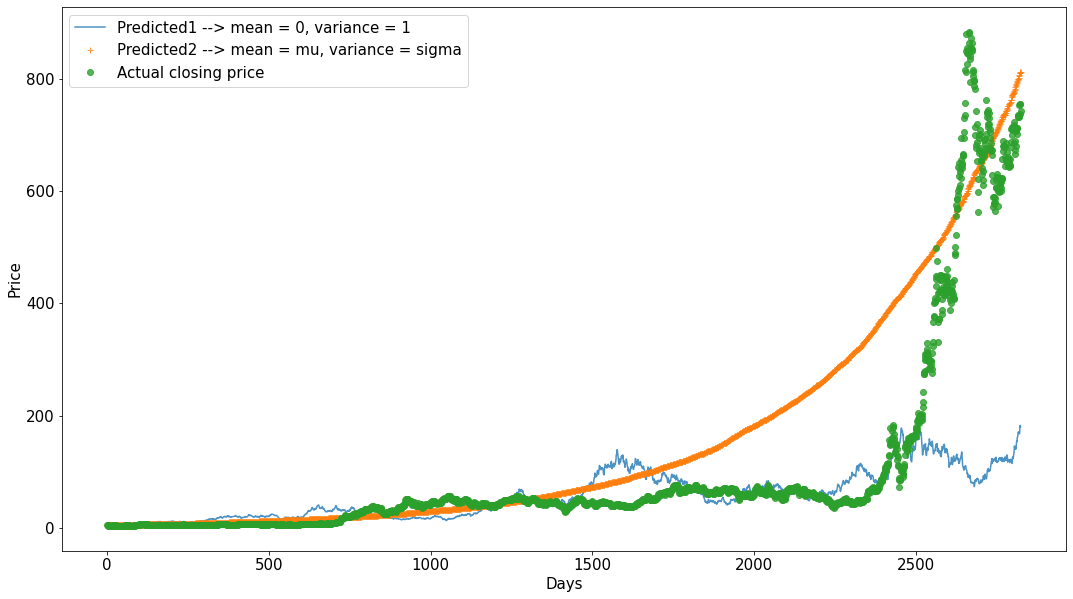

In [ ]:
# Plotting the simulations
plt.figure(figsize = (18,10))
t1 = np.insert(t, 0, 0, axis=0)
print(len(df.loc[:,'close']))
#plt.plot(t1,S[0,:],t1, S[1,:], t1 , df.loc[:T,'close'], 'o')

plt.rcParams.update({'font.size': 15})
plt.plot(t,S[0,:-1],t, S[1,:-1],'+', t , df.loc[:T,'close'], 'o',alpha = 0.8)
plt.legend(['Predicted1 --> mean = 0, variance = 1', 'Predicted2 --> mean = mu, variance = sigma', 'Actual closing price'])
plt.ylabel('Price')
plt.xlabel('Days')
plt.show()

### Limitations of GBM

Although we have applied the GBM in the stock prices simulation, the model performs well if the following conditions are sattisfied

•The company is a going concern, and its stock prices are continuous in time and value.

• Stocks  follow  a  Markov  process,  meaning  only  the  current  stock  price  is  relevant  for  predicting  future 
prices. 

• The proportional return of a stock is log-normally distributed. 

• The continuously compounded return for a stock is normally distributed.

The presence of these mathematical constraints may limit us generalizing the GBM model.

# 2. Finding the best fit trendline.


It is often needed in charting and technical analysis to come up with the cleanest fit trendline that allows in detecting the trend. In the data provided to you in `TSLA.csv` file you will find columns like `pivot` and `weight`.  Not all rows can be pivots. There are NaN values where the days candle did not result in becoming a piot. Pivot are historic reversal points in prices. By joining 2 or more pivots we can come up with a trendline. Now the non-trivial part here is to connect the best pivots while coming up with the trendline.

We have found the last N pivots that result in the best Trendline.

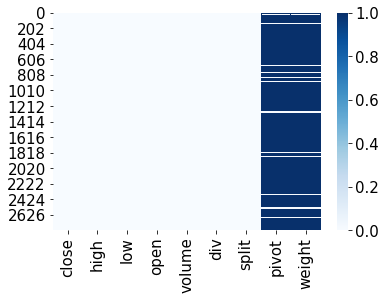

In [ ]:
sns.heatmap(df.isnull(), cmap = 'Blues')

In [ ]:
print("Null values in pivot \n{}".format(df['pivot'].tail(300).isnull().value_counts()))
print("\nNull values in weight \n{}".format(df['weight'].isnull().value_counts()))

Null values in pivot 
True     277
False     23
Name: pivot, dtype: int64

Null values in weight 
True     2632
False     192
Name: weight, dtype: int64


For the last N pivots lets look at the last 300 points in the data set

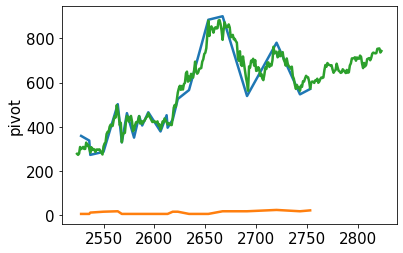

In [ ]:
sns.lineplot(data=df['pivot'].tail(300), palette="tab10", linewidth=2.5)
sns.lineplot(data=df['weight'].tail(300), palette="tab10", linewidth=2.5)
sns.lineplot(data=df['close'].tail(300), palette="tab10", linewidth=2.5)

In [ ]:
df0 = df.tail(300).copy()
col = []
for i in range(300):
    col.append(i+1)
df0['id'] = col
df0.head()

,close,high,low,open,volume,div,split,pivot,weight,id
2524,277.972,285.900,267.342,281.002,107448500,0.0,1.0,NaN,NaN,1
2525,273.176,283.452,262.268,281.000,81556500,0.0,1.0,NaN,NaN,2
2526,278.856,281.712,270.256,279.398,58588000,0.0,1.0,NaN,NaN,3
2527,308.930,309.784,275.202,279.200,116688000,0.0,1.0,NaN,NaN,4
2528,299.412,358.998,294.222,331.800,194927000,0.0,1.0,358.998,6.0,5


In [ ]:
# creating a high trend line
from scipy.stats import linregress
df1 = df0.copy()

while len(df1)>3:

    reg = linregress(
                    x=df1['id'],
                    y=df1['high'],
                    )
    df1 = df1.loc[df1['high'] > reg[0] * df1['id'] + reg[1]]


df0['high_trend'] = reg[0] * df0['id'] + reg[1]


In [ ]:
# Creating a low trend line
df2 = df0.copy()

while len(df2)>3:

    reg1 = linregress(
                    x=df2['id'],
                    y=df2['low'],
                    )
    df2 = df2.loc[df2['low'] < reg1[0] * df2['id'] + reg1[1]]



df0['low_trend'] = reg1[0] * df0['id'] + reg1[1]


In [ ]:
#Creating a Best fit trendline
x = np.arange(0, df0.shape[0], 1) + df.shape[0] - 300
print(len(x))
y = df0['close'].to_numpy()
a1, b1 = np.polyfit(x, y, 1)

300


### Plotting the Trendlines along with the Closing prices

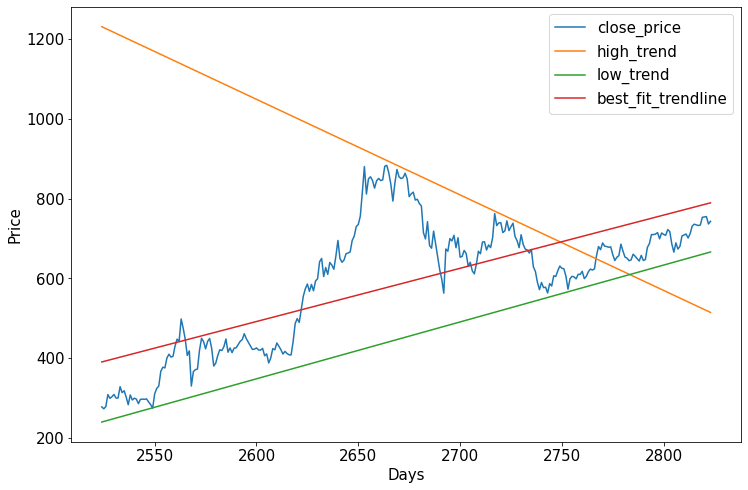

In [ ]:
plt.figure(figsize = (12,8))
df0['close'].tail(300).plot()
df0['high_trend'].plot()
df0['low_trend'].plot()
#plt.plot(x  , y, 'o', alpha = 0.5)
plt.plot(x, a1*x + b1)
plt.legend(['close_price','high_trend', 'low_trend', 'best_fit_trendline'])
plt.rcParams.update({'font.size': 15})
plt.ylabel('Price')
plt.xlabel('Days')
plt.show()


(23, 12)


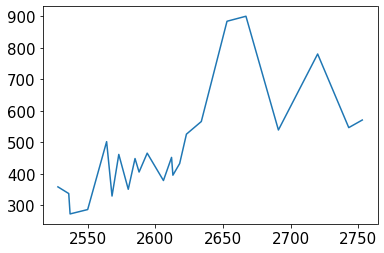

In [ ]:
df_dr = df0.dropna(axis = 0)
print(df_dr.shape)
df_dr['pivot'].plot()

### Plotting the best fit trendline with only N Pivot points from last 300 observations

23


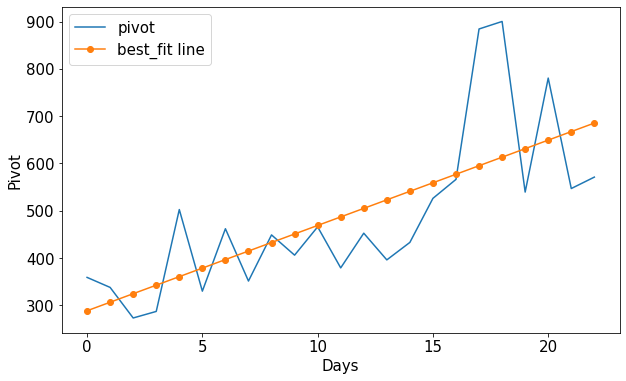

In [ ]:
x = np.arange(0, df_dr.shape[0], 1)
print(len(x))
y = df_dr['pivot'].to_numpy()
a1, b1 = np.polyfit(x, y, 1)
plt.figure(figsize = (10,6))
plt.plot(x  , y)
plt.plot(x, a1*x + b1, '-o')
plt.ylabel('Pivot')
plt.xlabel('Days')
plt.legend(['pivot','best_fit line'])
plt.show()

300


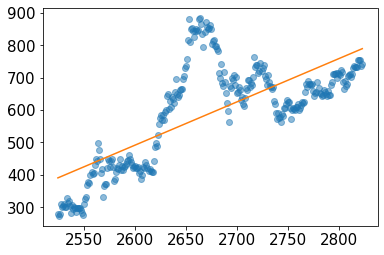

In [ ]:
x = np.arange(0, df0.shape[0], 1) + df.shape[0] - 300
print(len(x))
y = df0['close'].to_numpy()
a1, b1 = np.polyfit(x, y, 1)

plt.plot(x  , y, 'o', alpha = 0.5)
plt.plot(x, a1*x + b1)
plt.
plt.show()